In [45]:
#!pip install lifelines

In [46]:
import lifelines
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tempo médio de vida

Considerando quem tem ou não o problema.

In [47]:
df = pd.read_csv('./data/echocardiogram.csv')

In [48]:
disease = df[df['pericardialeffusion']==1]
non_disease  = df[df['pericardialeffusion']==0]

In [49]:
df = df[df['pericardialeffusion']!=77] # fixing dataset
df = df.dropna(subset=['survival','alive'])

In [50]:
disease['survival'].describe()

count    24.000000
mean     17.083333
std      16.201125
min       0.250000
25%       1.750000
50%      14.000000
75%      27.250000
max      52.000000
Name: survival, dtype: float64

In [67]:
disease[disease['alive']==0]['survival'].describe()

count    12.000000
mean     28.416667
std      13.621229
min      12.000000
25%      16.000000
50%      26.000000
75%      36.500000
max      52.000000
Name: survival, dtype: float64

Estimar apenas com os vivos ou com todos subestima e superestima respectivamente, você não trata corretamente quem não se sabe ao certo quando morreu


<AxesSubplot: xlabel='survival', ylabel='Proportion'>

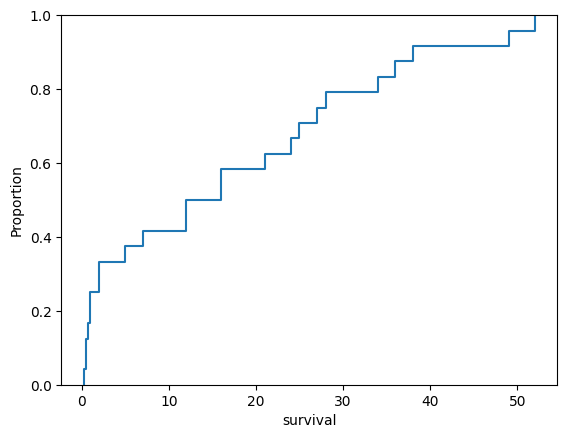

In [65]:
sns.ecdfplot(disease['survival'])

14 meses é o tempo de sobrevivência médio  de quem tem pericardialeffusion	

In [51]:
df.groupby('pericardialeffusion').describe()

survival                                                  \
                       count       mean        std   min    25%   50%    75%   
pericardialeffusion                                                            
0.0                    106.0  23.337547  15.626323  0.03  10.25  25.0  33.75   
1.0                     24.0  17.083333  16.201125  0.25   1.75  14.0  27.25   

                           alive            ...   mult        aliveat1  \
                      max  count      mean  ...    75%    max    count   
pericardialeffusion                         ...                          
0.0                  57.0  106.0  0.283019  ...  0.857  2.000     58.0   
1.0                  52.0   24.0  0.500000  ...  0.857  1.003     15.0   

                                                                   
                         mean       std  min  25%  50%   75%  max  
pericardialeffusion                                                
0.0                  0.258621  0.441701  0.0  0.0  0.0  0.75  1.0  
1.0                  0.533333  0.516398  0.0  0.0  1.0  1.00  1.0  

[2 rows x 80 columns]

# Survival Analysis 

In [52]:
from lifelines import KaplanMeierFitter

In [53]:
non_disease

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.000,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.700,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.000,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.450,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.250,0.571,name,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,7.5,1.0,64.0,0.0,0.240,12.900,4.720,12.0,1.000,0.857,name,NaN,NaN
129,41.0,0.0,64.0,0.0,0.280,5.400,5.470,11.0,1.100,0.714,name,NaN,NaN
130,36.0,0.0,69.0,0.0,0.200,7.000,5.050,14.5,1.210,0.857,name,NaN,NaN
131,22.0,0.0,57.0,0.0,0.140,16.100,4.360,15.0,1.360,0.786,name,NaN,NaN


In [54]:
kmf = KaplanMeierFitter()
kmf.fit(durations=disease['survival'], event_observed=disease['alive'])


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 24 total observations, 12 right-censored observations>

In [70]:
kmf.median_survival_time_

28.0

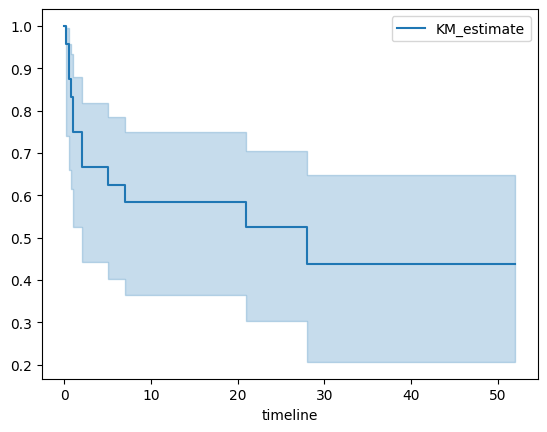

In [71]:
# Plot the survival function
kmf.plot_survival_function()
plt.show()